In [2]:
numbers =[2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]


In [3]:
freq = {}
for items in numbers:
    freq[items] = numbers.count(items)
for key, value in freq.items():
        print (" %d : %d"%(key, value))

 2 : 4
 4 : 5
 6 : 6
 8 : 3
 5 : 2
 1 : 3
 9 : 5
 0 : 2
 7 : 4
 3 : 5
 10 : 3


In [10]:
import matplotlib.pyplot as plt
import numpy as np 

<BarContainer object of 11 artists>

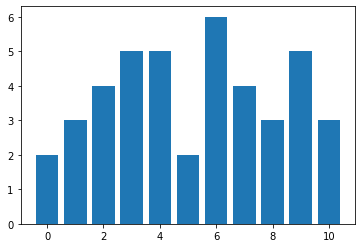

In [12]:
x =list(freq.keys())
y= list(freq.values())
plt.bar(x,y)



In [15]:
import json
print (json.dumps(freq))



{"2": 4, "4": 5, "6": 6, "8": 3, "5": 2, "1": 3, "9": 5, "0": 2, "7": 4, "3": 5, "10": 3}


In [19]:
import json
with open("midterm.json","w") as outfile:
    json.dump(freq, outfile)

In [58]:
path= working_directory + '/Viewing.csv'
df = pd.read_csv(path)

In [48]:
import os
print(os.getcwd())

/Users/aydinuluer


In [59]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Aydin,2021-10-21 14:25:25,00:06:08,NaN,Peaky Blinders: Season 3: Episode 1,NaN,Apple iPhone 11,00:55:19,00:55:19,US (United States)
1,Aydin,2021-10-21 13:11:56,00:18:40,NaN,Peaky Blinders: Season 3: Episode 1,NaN,Apple iPhone 11,00:47:27,Not latest view,US (United States)
2,Aydin,2021-10-21 11:53:24,00:28:17,NaN,Peaky Blinders: Season 3: Episode 1,NaN,Apple iPhone 11,00:28:57,Not latest view,US (United States)
3,Aydin,2021-10-21 05:14:02,00:00:19,NaN,Peaky Blinders: Season 3: Episode 1,NaN,Apple iPhone 11,00:00:20,Not latest view,US (United States)
4,Aydin,2021-10-20 20:50:37,00:12:19,NaN,Peaky Blinders: Season 2: Episode 5,NaN,Apple iPhone 11,00:31:54,00:31:54,US (United States)


In [61]:
df.shape

(23191, 10)

In [62]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2021-10-21 14:25:25,00:06:08,Peaky Blinders: Season 3: Episode 1


In [64]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [65]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [66]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()
df.head(1)

,Start Time,Duration,Title
0,2021-10-21 10:25:25-04:00,00:06:08,Peaky Blinders: Season 3: Episode 1


In [67]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [68]:
community = df[df['Title'].str.contains('Community', regex=False)]

In [69]:
community.shape

(1095, 3)

In [70]:
community = community[(community['Duration'] > '0 days 00:01:00')]
community.shape

(959, 3)

In [71]:
community['Duration'].sum()

Timedelta('9 days 06:33:28')

In [73]:
community['weekday'] = community['Start Time'].dt.weekday
community['hour'] = community['Start Time'].dt.hour
community.head(2)

,Start Time,Duration,Title,weekday,hour
544,2021-05-10 23:01:56-04:00,0 days 00:20:30,Community: Season 5: Basic Intergluteal Numism...,0,23
635,2021-03-31 12:58:42-04:00,0 days 00:02:47,Community: Season 3: Introduction to Finality ...,2,12


In [74]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Community Episodes Watched by Day'}>

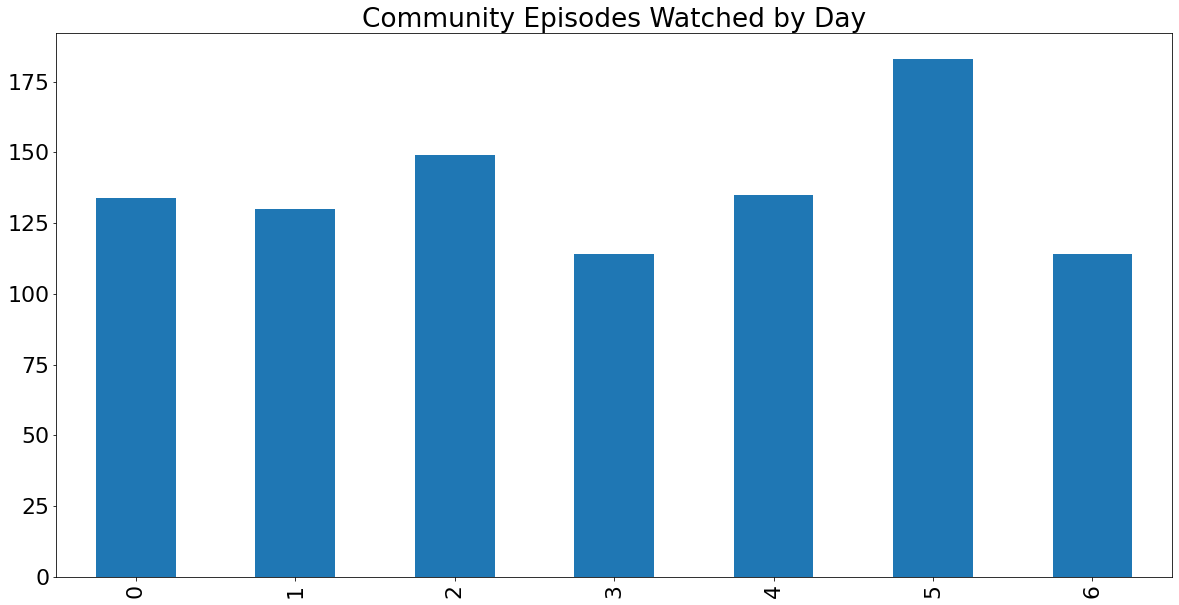

In [75]:
community['weekday'] = pd.Categorical(community['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
community_by_day = community['weekday'].value_counts()
community_by_day = community_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
community_by_day.plot(kind='bar', figsize=(20,10), title='Community Episodes Watched by Day')

<AxesSubplot:title={'center':'Community Episodes Watched by Hour'}>

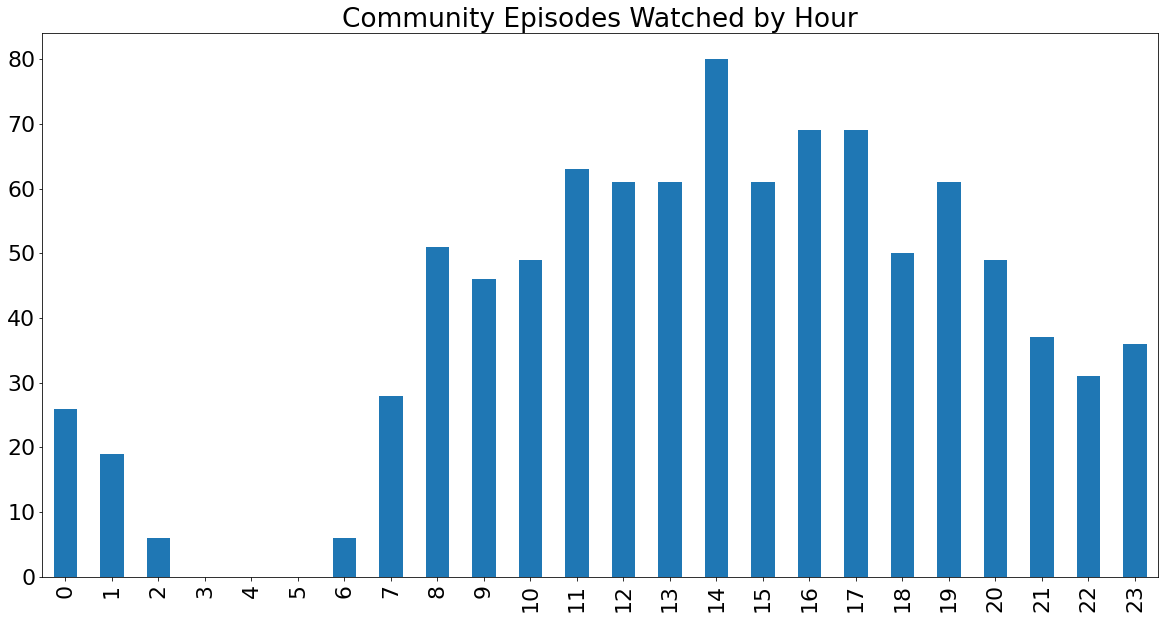

In [76]:
community['hour'] = pd.Categorical(community['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)
community_by_hour = community['hour'].value_counts()
community_by_hour = community_by_hour.sort_index()
community_by_hour.plot(kind='bar', figsize=(20,10), title='Community Episodes Watched by Hour')

In [85]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [86]:
office.shape

(1917, 3)

In [87]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(1718, 3)

In [84]:
df2.dtypes

Title          object
Device Type    object
dtype: object

In [88]:
office['Duration'].sum()

Timedelta('17 days 16:49:01')

In [89]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour


office.head(1)

,Start Time,Duration,Title,weekday,hour
3197,2019-10-18 22:20:55-04:00,0 days 00:14:18,The Office (U.S.): Season 3: Women's Appreciat...,4,22


<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

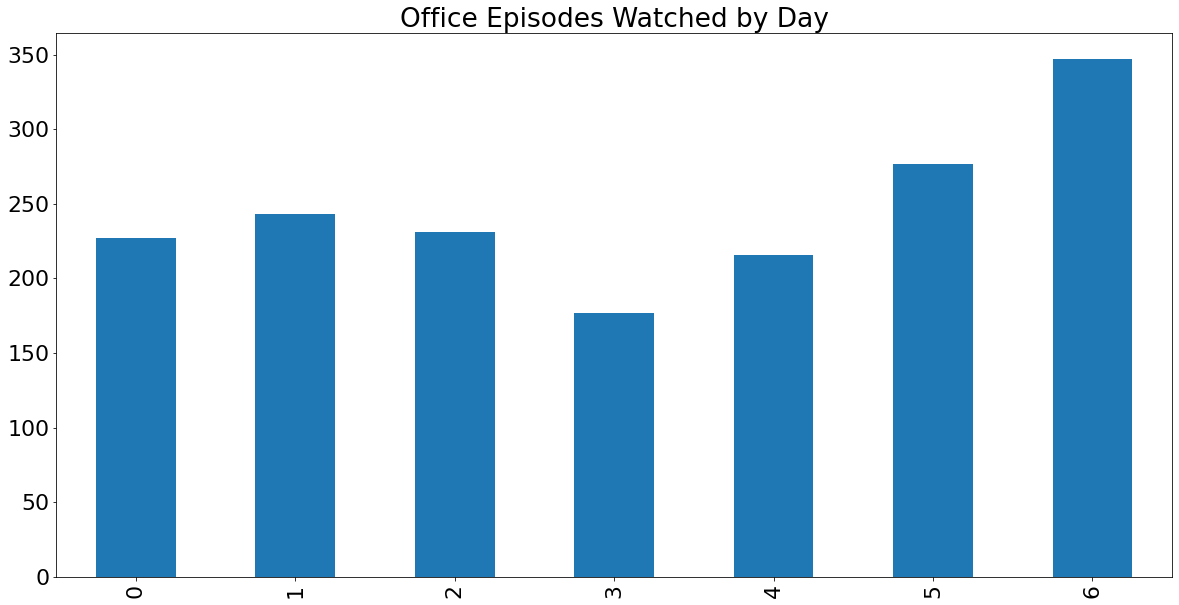

In [90]:
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)


office_by_day = office['weekday'].value_counts()


office_by_day = office_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})


office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

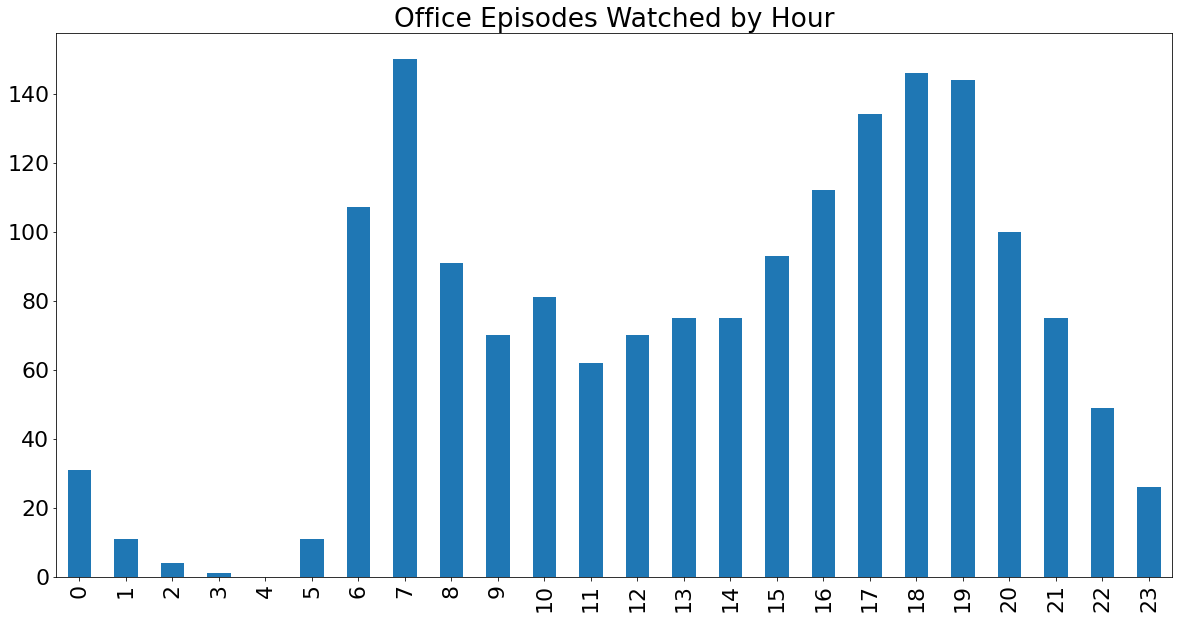

In [92]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)


office_by_hour = office['hour'].value_counts()

office_by_hour = office_by_hour.sort_index()

office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')